# Plotting with pandas and Matplotlib

Now that we are familiar with some of the capabilities that pandas offer, we will begin visualising our data in Python by utilising the built-in plotting choices that are immediately available in pandas.  In a manner that is analogous to the scenario of Pandas being built upon NumPy, charting in Pandas makes use of the plotting capabilities that are available in the Matplotlib plotting library.
In particular, we will employ features from the pyplot module in Matplotlib, which offers visualisation comparable to that of MATLAB. Tomorrow we will expand on this further in the last day of this Bootcamp


## Input data
- The data we will be using is the same data we just spent tidying up. 
- We begin by importing some packages

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
from IPython.display import Markdown, display
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%watermark -p pandas,matplotlib

pandas    : 1.4.2
matplotlib: 3.5.2



### Load data from pickle 

In [3]:
df = pd.read_pickle('12_tasks.pkl')
df.head()

task             info spatial_span                                        \
measure        device    max_score avg_score avg_ms_per_item num_correct   
(info, user)                                                               
45312         DESKTOP          5.0      4.75      2052.07381         4.0   
45315         DESKTOP          6.0       4.8     1842.607143         5.0   
45318         DESKTOP          6.0       5.0     1943.734694         4.0   
45319         DESKTOP          5.0      4.25     1900.488095         4.0   
45320         DESKTOP          NaN       NaN             NaN         NaN   

task                      grammatical_reasoning                         \
measure      num_attempts           final_score num_errors num_correct   
(info, user)                                                             
45312                 7.0                  19.0        0.0        19.0   
45315                 8.0                  25.0        0.0        24.0   
45318                 7.0                  17.0        1.0        18.0   
45319                 7.0                  21.0        1.0        22.0   
45320                 NaN                   8.0        5.0        13.0   

task                       ...          info                                 \
measure      num_attempts  ... hospital_stay handedness   employment_status   
(info, user)               ...                                                
45312                19.0  ...         False      Right  Employed full time   
45315                24.0  ...          True      Right  Employed full time   
45318                19.0  ...          True      Right  Employed full time   
45319                23.0  ...          True      Right               Other   
45320                18.0  ...          True      Right   Full time student   

task                                                                        \
measure                    exercise_freq alcohol_per_week caffeine_per_day   
(info, user)                                                                 
45312         Three or more times a week              3.0              1.0   
45315              Less than once a week              6.0              0.5   
45318              Less than once a week              1.0              1.0   
45319               Once or twice a week              0.0              0.0   
45320              Less than once a week              0.5              1.0   

task                                                             
measure      cigarettes_per_day cannabis stimulants depressants  
(info, user)                                                     
45312                       0.0    False      False       False  
45315                       0.0     True      False       False  
45318                       0.0    False      False       False  
45319                       0.0    False      False       False  
45320                       0.0    False      False       False  

[5 rows x 90 columns]

### Before we can plot anything we should remove missing data 
- Missing data is a real problem and we will address it in the first day of our course  
- For now we will take the harsh and wasteful approach of discarding any observation that has missing data 

In [4]:
missing = f'### Dataset had {df.shape[0]} obs and after removing those with missing data we have  {df.dropna().shape[0]} obs'
display(Markdown(missing))
df = df.dropna()

### Dataset had 10233 obs and after removing those with missing data we have  5282 obs

### Now that our dataframe is full we can go over the different plotting capabilities pandas supports 
#### The simplest plot - the pie chart 

- A pie chart is a circular statistical visual that is divided into slices to show numerical proportion. 
- The arc length of each slice in a pie chart (and thus its centre angle and area) is proportionate to the quantity it shows. 
- Meaningful when there are only up to 5 categories, this sum of a whole plot gives some idea of the proportion of the different categories in a dataset 
- Here we are using the `value_counts` method that is specific to a Series in Pandas 
- We could go further and automate this with some help from the parent plotting tool matplotlib 

<AxesSubplot:ylabel='device'>

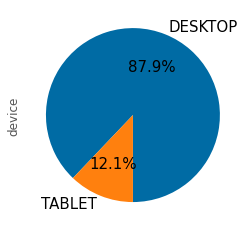

In [16]:
demo = df[['info']].droplevel(0,1)
demo.device.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=15)

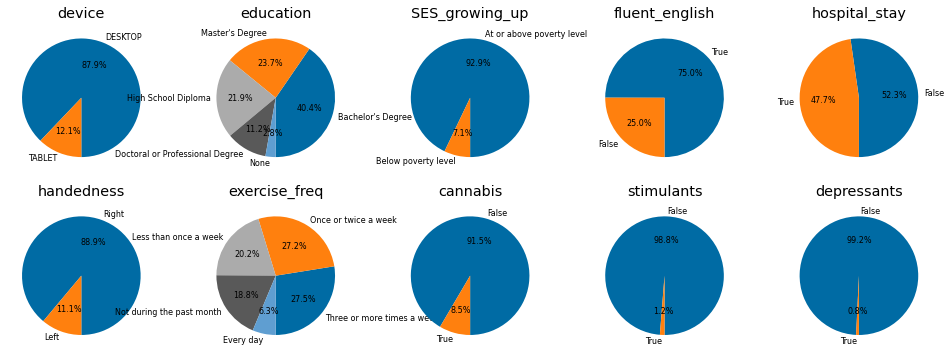

In [17]:
to_plot = [ col for col in demo if demo[col].unique().shape[0]<=5 ]
fig,axes = plt.subplots(2,len(to_plot)//2,figsize=(15,6))
axes = axes.flat
for ax,feature in zip(axes,to_plot):
    demo[feature].value_counts().plot(kind='pie',ax=ax, autopct='%1.1f%%', startangle=270, fontsize=8)
    ax.set_title(feature)
    ax.set_ylabel('')

#### The next simplest plot - the bar chart 
- A bar chart or bar graph is a type of chart or graph that displays categorical data using rectangular bars with heights or lengths proportional to the values they represent. 
- The bars can be plotted horizontally or vertically. 
- A vertical bar chart is also known as a column chart.
- A bar graph compares two or more distinct categories. 
- The chart's one axis reflects the specific categories being compared, while the other axis displays a measured value. 
- Some bar graphs show bars clustered in groups of more than one, displaying the values of multiple measured variables.

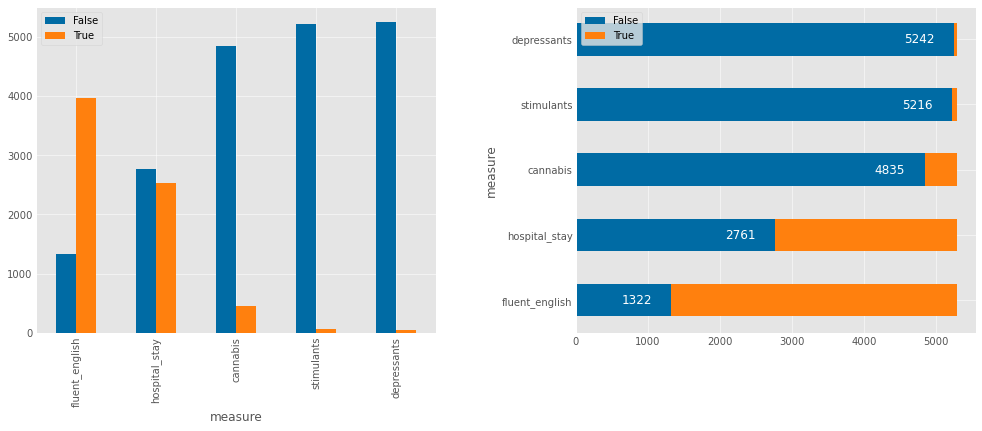

In [18]:
to_plot = [ col for col in demo if pd.api.types.is_bool_dtype(demo[col]) ]
fig,ax = plt.subplots(1,2,figsize=(15,6))

demo[to_plot].apply(pd.Series.value_counts).T.plot.bar(ax=ax[0])
demo[to_plot].apply(pd.Series.value_counts).T.plot.barh(ax=ax[1],stacked=True)
ax[1].bar_label(ax[1].containers[0],padding=-50,fontsize=12,color='w')

fig.subplots_adjust(wspace=0.35)

#### The next plot - the histogram chart 
- A histogram is an approximation of the distribution of numerical data. 
- The first stage in creating a histogram is to "bin" (or "bucket") the range of values, which means dividing the full range of values into a series of intervals and then counting how many values fall into each interval. 
- Bins are often stated as non-overlapping, sequential intervals of a variable. 
- The bins (intervals) must be adjacent and often (but not always) of comparable size.


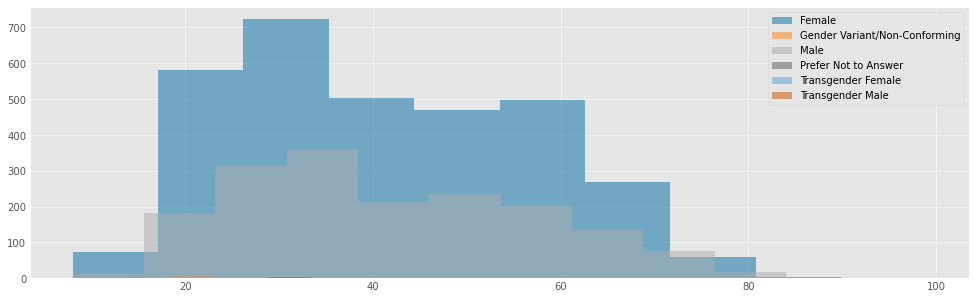

In [19]:
demo.query('0 < age < 100').groupby('sex').age.hist(alpha=0.5,legend=True,figsize=(15,5));

#### The next plot - the box chart 
- In descriptive statistics, a box plot shows location, spread, and skewness through quartiles. 
- In addition to the box on a box plot, whiskers can extend from the box to indicate variability outside the top and lower quartiles. 
- Outliers can be plotted as isolated points beyond the whiskers on a box-plot. 
- Box plots are non-parametric: they illustrate variance in samples of a statistical population without assuming the underlying statistical distribution.

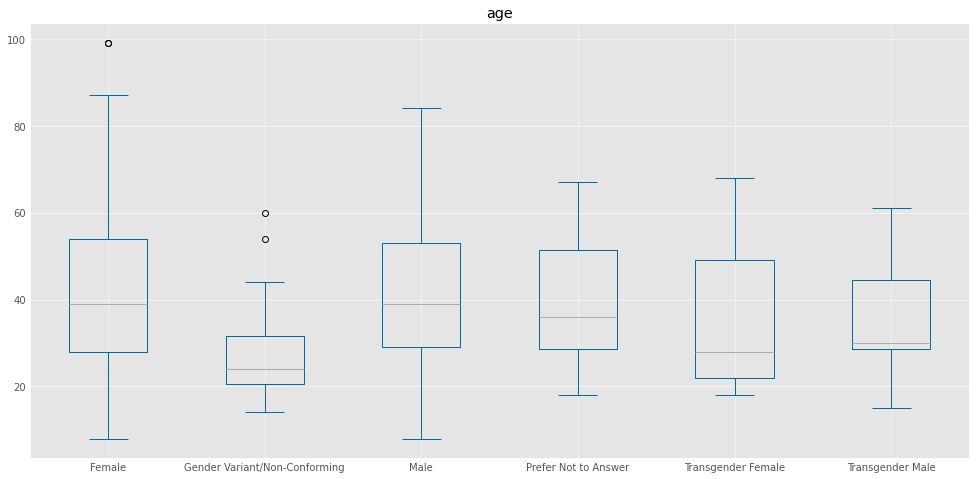

In [20]:
ax = demo.query('0 < age < 100').plot.box(column="age", by="sex", figsize=(15, 8))

#### The next plot - the kernel density (kde) chart 
- The term "kernel density estimation" (KDE) refers to a non-parametric method that is used in the field of statistics to estimate the probability density function of a random variable. 
- The estimation of the kernel density is a fundamental data smoothing problem that involves drawing conclusions about the population on the basis of a limited data sample.
- The kernel density chart is used to communicate the shape of the distribution  

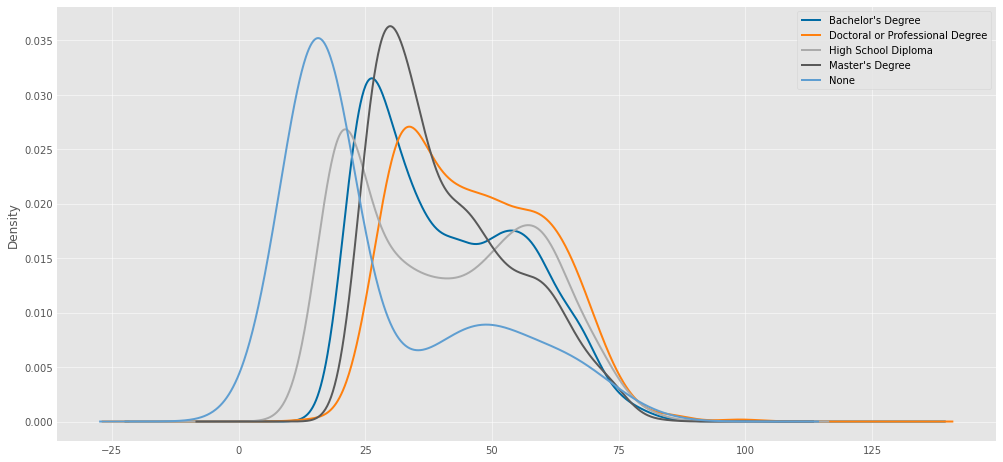

In [21]:
demo.query('0 < age < 100').groupby('education').age.plot.density(legend = True, figsize=(15, 8));

#### The next plot - the stepped area chart 
- A step area chart is an area chart in which points are connected by horizontal and vertical line segments, looking like steps of a staircase. 
- The area between the line segments and the X-axis is filled with color or a pattern.

<AxesSubplot:>

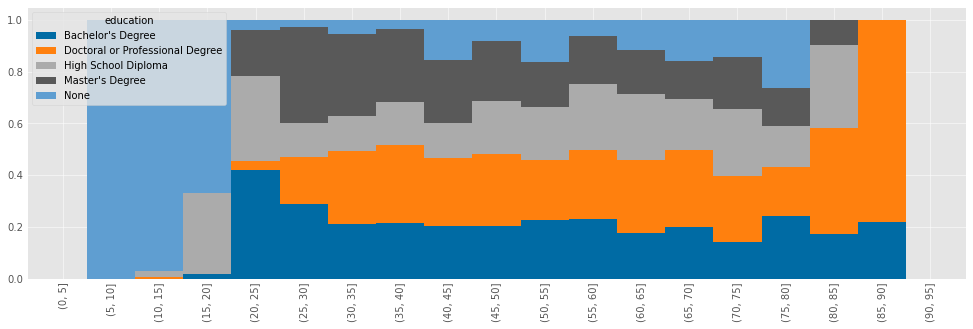

In [22]:
prop = (demo.
        assign(age_band = pd.cut(demo.age,np.arange(0,100,5))).
        query('0 < age < 100').
        groupby('education').
        age_band.
        apply(pd.Series.value_counts,normalize=True).
        unstack().
        fillna(0))
prop = prop/prop.sum()
prop.T.plot(figsize=(15,5),kind="bar",stacked=True,width = 1)

#### The next plot - the scatter chart 
- A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables.
- The position of each dot on the horizontal and vertical axis indicates values for an individual data point. 
- Scatter plots are used to observe relationships between variables.

<AxesSubplot:xlabel='age', ylabel='spatial_span_ms'>

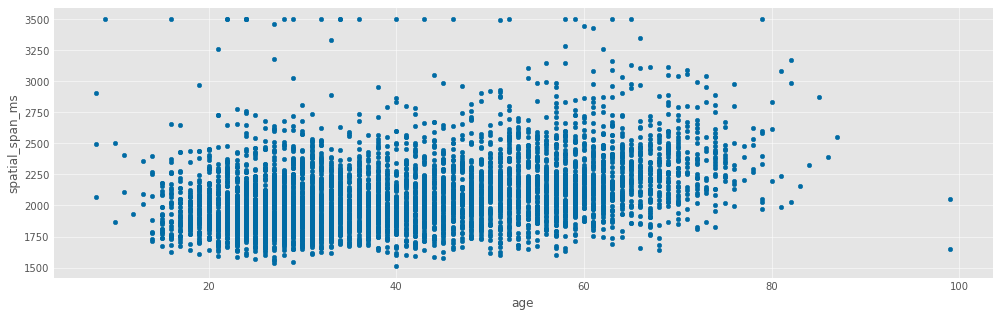

In [23]:
tmp = demo.assign(spatial_span_ms = np.clip(df.xs('spatial_span',1).avg_ms_per_item,0,3500))
tmp.query('0 < age < 100').plot.scatter('age','spatial_span_ms',figsize=(15,5))

#### The next plot - the line chart 
- A line chart or line plot or line graph or curve chart is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments. 
- It is a basic type of chart common in many fields.

<AxesSubplot:xlabel='age'>

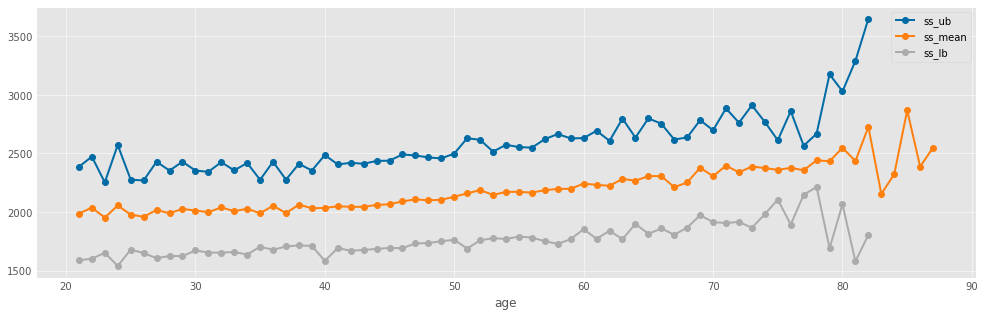

In [33]:
(tmp.groupby('age').
 agg(ss_ub = ('spatial_span_ms',lambda x: x.mean() + 1.5 * x.std() ),
     ss_mean = ('spatial_span_ms','mean'),
     ss_lb = ('spatial_span_ms',lambda x: x.mean() - 1.5 * x.std() )).
 query('20 < age < 90').plot(figsize=(15,5),style='o-'))


#### Final plot for today the hexbin 
- Hexbin map uses hexagons to split the area into several parts and attribute a color to it. The graphic area is divided into a multitude of hexagons and the number of data points in each is counted and represented using a color gradient.
- This is in fact a 2D histogram 

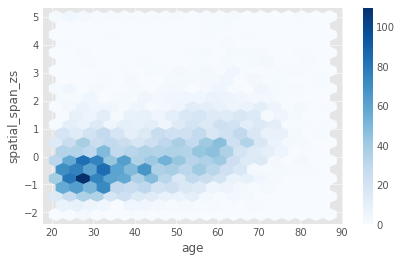

In [29]:
from scipy.stats import zscore 
tmp = tmp.query('20 < age < 90')
spatial_span_zs = zscore(tmp.spatial_span_ms.astype(float))
tmp = tmp.assign(spatial_span_zs =   spatial_span_zs  )
ax = tmp.plot.hexbin(x='age', y='spatial_span_zs', gridsize=20, sharex=False,cmap='Blues')


## Links to expand your understanding 

For those interested in learning more...
- [Chart Visualization in Pandas](https://pandas.pydata.org/docs/user_guide/visualization.html#chart-visualization)
- [Pandas Plotting tools)](https://pandas.pydata.org/docs/user_guide/visualization.html#plotting-tools)
- [Pandas cufflinks)](https://github.com/santosjorge/cufflinks)